# Mapping Test OPAL Images

In [25]:
#RUN ME BEFORE ANYTHING ELSE!!! I import all of the required modules and functions!!
import matplotlib.pyplot as plt
%matplotlib inline
plt.ion()
print('Imported and initialised matplotlib...')
import astropy.io.fits as ast
print('Imported Astropy...')
from MapFunc import *
print('Imported User Defined Functions...')
from tools.mapping import *
from tools.image import *
print("Imported Oliver King's tools, v1.4 ...")
col = 'viridis'
xcol = 'red'
lvls = 1000
print("Graphical Parameters initialised...")
print('All Modules Imported Successfully!')

Imported and initialised matplotlib...
Imported Astropy...
Imported User Defined Functions...
Imported Oliver King's tools, v1.4 ...
Graphical Parameters initialised...
All Modules Imported Successfully!


C:\Users\jamie\Documents\Uni Work\Year 4\PA4900 Specialist Research Project\CODE AHHHHHHH\Neptune from Scratch\IMAGE MAPPING\Final Mappings\tools\mapping.py:331: RuntimeWarning: invalid value encountered in sqrt
  z_img = np.sqrt(1 - x_img**2 - y_img**2)


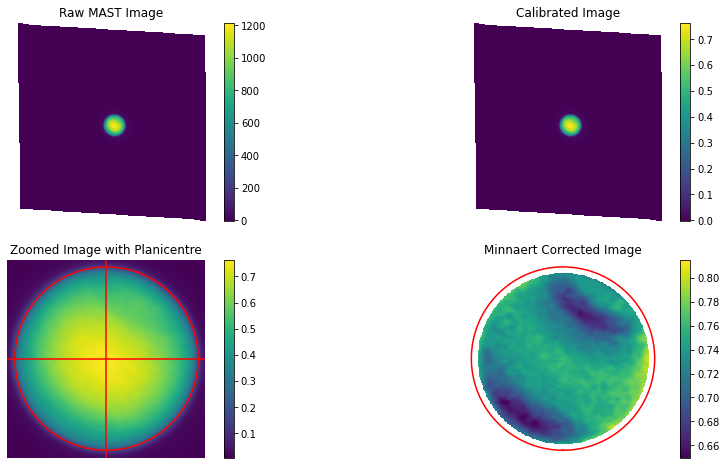

C:\Users\jamie\Documents\Uni Work\Year 4\PA4900 Specialist Research Project\CODE AHHHHHHH\Neptune from Scratch\IMAGE MAPPING\Final Mappings\tools\mapping.py:331: RuntimeWarning: invalid value encountered in sqrt
  z_img = np.sqrt(1 - x_img**2 - y_img**2)
C:\Users\jamie\Documents\Uni Work\Year 4\PA4900 Specialist Research Project\CODE AHHHHHHH\Neptune from Scratch\IMAGE MAPPING\Final Mappings\tools\mapping.py:527: RuntimeWarning: invalid value encountered in remainder
  long_img = long_img % (2*np.pi)  # ensure values are in expected range


.


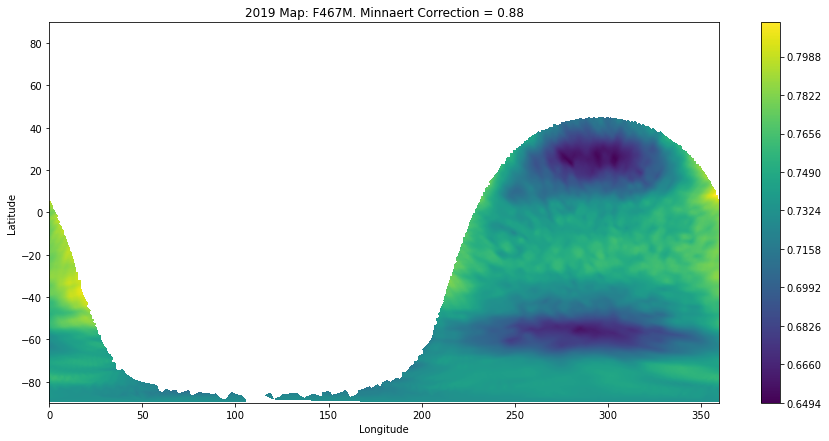

In [26]:
mfac = 0.88

img, hdr, scihdr = open_img('data/test/467_1_drz.fits')
eph = get_ephemerides(target='neptune',loc='hst',epoch=hdr['EXPSTART'])

IF, pltscl = calc_IF(eph['r'], hdr['PHOTFLAM'], 2019.04)

img = interp_image(img,4) #interpolate image to have higher resolution, rest of the block deals with the consequences of this
pltscl = pltscl/4

plt.figure(figsize=(15,8))
ax1 = plt.subplot(221)
im = ax1.imshow(img, cmap=col)
plt.title('Raw MAST Image')
plt.colorbar(im)
ax1.axis('off')

img = img*IF

ax2 = plt.subplot(222)
im2 = ax2.imshow(img, cmap=col)
plt.title('Calibrated Image')
plt.colorbar(im2)
ax2.axis('off')

rad = float(eph['ang_width'])/(2*pltscl)
img, y, x = circ(img,rad)
img, planicentre = get_planicentre(img,rad)

ax3 = plt.subplot(223)
im3 = ax3.imshow(img, cmap=col)
plt.title('Zoomed Image with Planicentre')
ax3.axhline(planicentre[1],color=xcol)
ax3.axvline(planicentre[0],color=xcol)
ax3.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im3)
ax3.axis('off')

img = minnaert(img, planicentre, mfac, eph)

ax4 = plt.subplot(224)
im4 = ax4.imshow(img, cmap=col)
plt.title('Minnaert Corrected Image')
#ax4.axhline(planicentre[1],color=xcol)
#ax4.axvline(planicentre[0],color=xcol)
ax4.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im4)
ax4.axis('off')
plt.show()

ang_corr = float(scihdr['ORIENTAT'])-float(eph['NPole_ang']) #the angle with which to correct the north pole of the image

mapped_img = map_observation(img, planicentre[0], planicentre[1], planicentre[2], ang_corr, eph['PDObsLon'], eph['PDObsLat'])

plt.figure(figsize=(15,7))
plt.contourf(mapped_img[1], mapped_img[2], mapped_img[0],levels=lvls)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('2019 Map: F467M. Minnaert Correction = '+str(mfac))
plt.colorbar()
plt.show()

flipped_img = np.flip(mapped_img[0],0)

#plt.figure(figsize=(15,14))
#ax1 = plt.subplot(211)
#ax1.imshow(mapped_img[0])
#ax2 = plt.subplot(212)
#ax2.imshow(flipped_img)
#plt.show()

#Save the Plot to a File
plt.figure(figsize=(15,7)) #saves the map to a .png to possibly be used in my report
plt.contourf(mapped_img[1], mapped_img[2], mapped_img[0],levels=lvls)
plt.axis('off')
plt.savefig('maps/OPALCyc26/467_1.png')
plt.close()

hdu = ast.PrimaryHDU(flipped_img) #saves the map to a fits image to be read by the reflectance plotter#
#hdu.writeto('maps/OPALCyc26/467_1.fits')

C:\Users\jamie\Documents\Uni Work\Year 4\PA4900 Specialist Research Project\CODE AHHHHHHH\Neptune from Scratch\IMAGE MAPPING\Final Mappings\tools\mapping.py:331: RuntimeWarning: invalid value encountered in sqrt
  z_img = np.sqrt(1 - x_img**2 - y_img**2)
C:\Users\jamie\Documents\Uni Work\Year 4\PA4900 Specialist Research Project\CODE AHHHHHHH\Neptune from Scratch\IMAGE MAPPING\Final Mappings\tools\mapping.py:331: RuntimeWarning: invalid value encountered in sqrt
  z_img = np.sqrt(1 - x_img**2 - y_img**2)
C:\Users\jamie\Documents\Uni Work\Year 4\PA4900 Specialist Research Project\CODE AHHHHHHH\Neptune from Scratch\IMAGE MAPPING\Final Mappings\tools\mapping.py:527: RuntimeWarning: invalid value encountered in remainder
  long_img = long_img % (2*np.pi)  # ensure values are in expected range


.


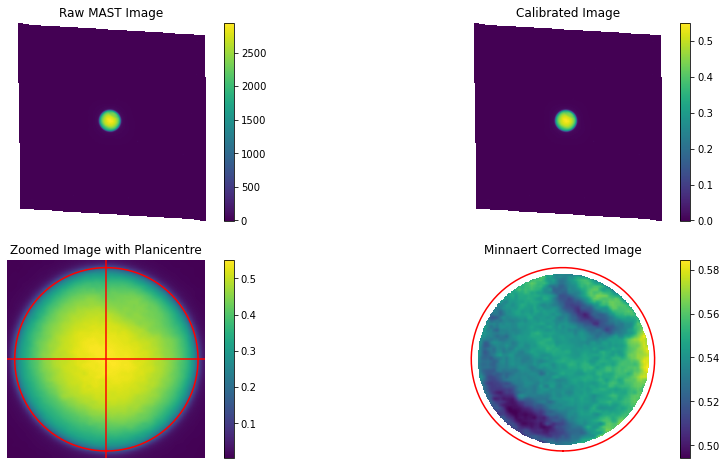

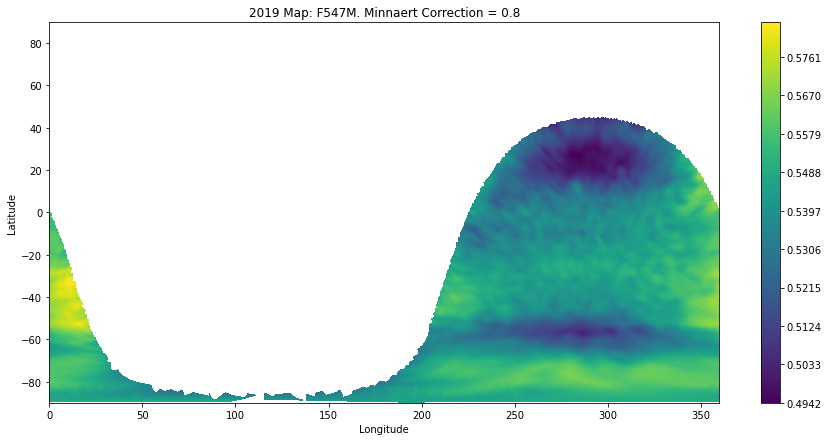

OSError: File 'maps/OPALCyc26/547_1.fits' already exists.

In [27]:
mfac = 0.80

img, hdr, scihdr = open_img('data/test/547_1_drz.fits')
eph = get_ephemerides(target='neptune',loc='hst',epoch=hdr['EXPSTART'])

IF, pltscl = calc_IF(eph['r'], hdr['PHOTFLAM'], 1859.82)

img = interp_image(img,4) #interpolate image to have higher resolution, rest of the block deals with the consequences of this
pltscl = pltscl/4

plt.figure(figsize=(15,8))
ax1 = plt.subplot(221)
im = ax1.imshow(img, cmap=col)
plt.title('Raw MAST Image')
plt.colorbar(im)
ax1.axis('off')

img = img*IF

ax2 = plt.subplot(222)
im2 = ax2.imshow(img, cmap=col)
plt.title('Calibrated Image')
plt.colorbar(im2)
ax2.axis('off')

rad = float(eph['ang_width'])/(2*pltscl)
img, y, x = circ(img,rad)
img, planicentre = get_planicentre(img,rad)

ax3 = plt.subplot(223)
im3 = ax3.imshow(img, cmap=col)
plt.title('Zoomed Image with Planicentre')
ax3.axhline(planicentre[1],color=xcol)
ax3.axvline(planicentre[0],color=xcol)
ax3.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im3)
ax3.axis('off')

img = minnaert(img, planicentre, mfac, eph)

ax4 = plt.subplot(224)
im4 = ax4.imshow(img, cmap=col)
plt.title('Minnaert Corrected Image')
#ax4.axhline(planicentre[1],color=xcol)
#ax4.axvline(planicentre[0],color=xcol)
ax4.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im4)
ax4.axis('off')

ang_corr = float(scihdr['ORIENTAT'])-float(eph['NPole_ang']) #the angle with which to correct the north pole of the image

mapped_img = map_observation(img, planicentre[0], planicentre[1], planicentre[2], ang_corr, eph['PDObsLon'], eph['PDObsLat'])

plt.figure(figsize=(15,7))
plt.contourf(mapped_img[1], mapped_img[2], mapped_img[0],levels=lvls)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('2019 Map: F547M. Minnaert Correction = '+str(mfac))
plt.colorbar()
plt.show()

flipped_img = np.flip(mapped_img[0],0)

#plt.figure(figsize=(15,14))
#ax1 = plt.subplot(211)
#ax1.imshow(mapped_img[0])
#ax2 = plt.subplot(212)
#ax2.imshow(flipped_img)
#plt.show()

#Save the Plot to a File
plt.figure(figsize=(15,7)) #saves the map to a .png to possibly be used in my report
plt.contourf(mapped_img[1], mapped_img[2], mapped_img[0],levels=lvls)
plt.axis('off')
plt.savefig('maps/OPALCyc26/547_1.png')
plt.close()

hdu = ast.PrimaryHDU(flipped_img) #saves the map to a fits image to be read by the reflectance plotter#
hdu.writeto('maps/OPALCyc26/547_1.fits')

In [ ]:
mfac = 0.42

img, hdr, scihdr = open_img('data/test/619_1_drz.fits')
eph = get_ephemerides(target='neptune',loc='hst',epoch=hdr['EXPSTART'])

IF, pltscl = calc_IF(eph['r'], hdr['PHOTFLAM'], 1707.85)

img = img[200:(img.shape[0]-200),200:(img.shape[1]-200)]
img = tools.image.exp_despike(img)

img = interp_image(img,4) #interpolate image to have higher resolution, rest of the block deals with the consequences of this
pltscl = pltscl/4

plt.figure(figsize=(15,8))
ax1 = plt.subplot(221)
im = ax1.imshow(img, cmap=col)
plt.title('Raw MAST Image')
plt.colorbar(im)
ax1.axis('off')

img = img*IF

ax2 = plt.subplot(222)
im2 = ax2.imshow(img, cmap=col)
plt.title('Calibrated Image')
plt.colorbar(im2)
ax2.axis('off')

rad = float(eph['ang_width'])/(2*pltscl)
img, y, x = circ(img,rad)
img, planicentre = get_planicentre(img,rad)

ax3 = plt.subplot(223)
im3 = ax3.imshow(img, cmap=col)
plt.title('Zoomed Image with Planicentre')
ax3.axhline(planicentre[1],color=xcol)
ax3.axvline(planicentre[0],color=xcol)
ax3.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im3)
ax3.axis('off')

img = minnaert(img, planicentre, mfac, eph)

ax4 = plt.subplot(224)
im4 = ax4.imshow(img, cmap=col)
plt.title('Minnaert Corrected Image')
#ax4.axhline(planicentre[1],color=xcol)
#ax4.axvline(planicentre[0],color=xcol)
ax4.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im4)
ax4.axis('off')

ang_corr = float(scihdr['ORIENTAT'])-float(eph['NPole_ang']) #the angle with which to correct the north pole of the image

mapped_img = map_observation(img, planicentre[0], planicentre[1], planicentre[2], ang_corr, eph['PDObsLon'], eph['PDObsLat'])

plt.figure(figsize=(15,7))
plt.contourf(mapped_img[1], mapped_img[2], mapped_img[0],levels=lvls)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('2019 Map: FQ619N. Minnaert Correction = '+str(mfac))
plt.colorbar()
plt.show()

flipped_img = np.flip(mapped_img[0],0)

#plt.figure(figsize=(15,14))
#ax1 = plt.subplot(211)
#ax1.imshow(mapped_img[0])
#ax2 = plt.subplot(212)
#ax2.imshow(flipped_img)
#plt.show()

#Save the Plot to a File
plt.figure(figsize=(15,7)) #saves the map to a .png to possibly be used in my report
plt.contourf(mapped_img[1], mapped_img[2], mapped_img[0],levels=lvls)
plt.axis('off')
plt.savefig('maps/OPALCyc26/619_1.png')
plt.close()

hdu = ast.PrimaryHDU(flipped_img) #saves the map to a fits image to be read by the reflectance plotter#
#hdu.writeto('maps/OPALCyc26/619_1.fits')

In [ ]:
mfac = 0.6

img, hdr, scihdr = open_img('data/test/657_1_drz.fits')
eph = get_ephemerides(target='neptune',loc='hst',epoch=hdr['EXPSTART'])

IF, pltscl = calc_IF(eph['r'], hdr['PHOTFLAM'], 1238.00)

img = interp_image(img,4) #interpolate image to have higher resolution, rest of the block deals with the consequences of this
pltscl = pltscl/4

plt.figure(figsize=(15,8))
ax1 = plt.subplot(221)
im = ax1.imshow(img, cmap=col)
plt.title('Raw MAST Image')
plt.colorbar(im)
ax1.axis('off')

img = img*IF

ax2 = plt.subplot(222)
im2 = ax2.imshow(img, cmap=col)
plt.title('Calibrated Image')
plt.colorbar(im2)
ax2.axis('off')

rad = float(eph['ang_width'])/(2*pltscl)
img, y, x = circ(img,rad)
img, planicentre = get_planicentre(img,rad)

ax3 = plt.subplot(223)
im3 = ax3.imshow(img, cmap=col)
plt.title('Zoomed Image with Planicentre')
ax3.axhline(planicentre[1],color=xcol)
ax3.axvline(planicentre[0],color=xcol)
ax3.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im3)
ax3.axis('off')

img = minnaert(img, planicentre, mfac, eph)

ax4 = plt.subplot(224)
im4 = ax4.imshow(img, cmap=col)
plt.title('Minnaert Corrected Image')
#ax4.axhline(planicentre[1],color=xcol)
#ax4.axvline(planicentre[0],color=xcol)
ax4.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im4)
ax4.axis('off')

ang_corr = float(scihdr['ORIENTAT'])-float(eph['NPole_ang']) #the angle with which to correct the north pole of the image

mapped_img = map_observation(img, planicentre[0], planicentre[1], planicentre[2], ang_corr, eph['PDObsLon'], eph['PDObsLat'])

plt.figure(figsize=(15,7))
plt.contourf(mapped_img[1], mapped_img[2], mapped_img[0],levels=lvls)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('2019 Map: F657N. Minnaert Correction = '+str(mfac))
plt.colorbar()
plt.show()

flipped_img = np.flip(mapped_img[0],0)

#plt.figure(figsize=(15,14))
#ax1 = plt.subplot(211)
#ax1.imshow(mapped_img[0])
#ax2 = plt.subplot(212)
#ax2.imshow(flipped_img)
#plt.show()

#Save the Plot to a File
plt.figure(figsize=(15,7)) #saves the map to a .png to possibly be used in my report
plt.contourf(mapped_img[1], mapped_img[2], mapped_img[0],levels=lvls)
plt.axis('off')
plt.savefig('maps/OPALCyc26/657_1.png')
plt.close()

hdu = ast.PrimaryHDU(flipped_img) #saves the map to a fits image to be read by the reflectance plotter#
#hdu.writeto('maps/OPALCyc26/657_1.fits')

In [ ]:
mfac = 0.3

img, hdr, scihdr = open_img('data/test/727_1_drz.fits')
eph = get_ephemerides(target='neptune',loc='hst',epoch=hdr['EXPSTART'])

IF, pltscl = calc_IF(eph['r'], hdr['PHOTFLAM'], 1339.23)

img = img[200:(img.shape[0]-200),200:(img.shape[1]-200)]
img = tools.image.exp_despike(img)

img = interp_image(img,4) #interpolate image to have higher resolution, rest of the block deals with the consequences of this
pltscl = pltscl/4

plt.figure(figsize=(15,8))
ax1 = plt.subplot(221)
im = ax1.imshow(img, cmap=col)
plt.title('Raw MAST Image')
plt.colorbar(im)
ax1.axis('off')

img = img*IF

ax2 = plt.subplot(222)
im2 = ax2.imshow(img, cmap=col)
plt.title('Calibrated Image')
plt.colorbar(im2)
ax2.axis('off')

rad = float(eph['ang_width'])/(2*pltscl)
img, y, x = circ(img,rad)
img, planicentre = get_planicentre(img,rad, iterations=2,croppix=1600)

ax3 = plt.subplot(223)
im3 = ax3.imshow(img, cmap=col)
plt.title('Zoomed Image with Planicentre')
ax3.axhline(planicentre[1],color=xcol)
ax3.axvline(planicentre[0],color=xcol)
ax3.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im3)
ax3.axis('off')

img = minnaert(img, planicentre, mfac, eph)

ax4 = plt.subplot(224)
im4 = ax4.imshow(img, cmap=col)
plt.title('Minnaert Corrected Image')
#ax4.axhline(planicentre[1],color=xcol)
#ax4.axvline(planicentre[0],color=xcol)
ax4.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im4)
ax4.axis('off')

ang_corr = float(scihdr['ORIENTAT'])-float(eph['NPole_ang']) #the angle with which to correct the north pole of the image

mapped_img = map_observation(img, planicentre[0], planicentre[1], planicentre[2], ang_corr, eph['PDObsLon'], eph['PDObsLat'])

plt.figure(figsize=(15,7))
plt.contourf(mapped_img[1], mapped_img[2], mapped_img[0],levels=lvls)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('2019 Map: FQ727N. Minnaert Correction = '+str(mfac))
plt.colorbar()
plt.show()

flipped_img = np.flip(mapped_img[0],0)

#plt.figure(figsize=(15,14))
#ax1 = plt.subplot(211)
#ax1.imshow(mapped_img[0])
#ax2 = plt.subplot(212)
#ax2.imshow(flipped_img)
#plt.show()

#Save the Plot to a File
plt.figure(figsize=(15,7)) #saves the map to a .png to possibly be used in my report
plt.contourf(mapped_img[1], mapped_img[2], mapped_img[0],levels=lvls)
plt.axis('off')
plt.savefig('maps/OPALCyc26/727_1.png')
plt.close()

hdu = ast.PrimaryHDU(flipped_img) #saves the map to a fits image to be read by the reflectance plotter#
#hdu.writeto('maps/OPALCyc26/727_1.fits')

C:\Users\jamie\Documents\Uni Work\Year 4\PA4900 Specialist Research Project\CODE AHHHHHHH\Neptune from Scratch\IMAGE MAPPING\Final Mappings\tools\mapping.py:331: RuntimeWarning: invalid value encountered in sqrt
  z_img = np.sqrt(1 - x_img**2 - y_img**2)
C:\Users\jamie\Documents\Uni Work\Year 4\PA4900 Specialist Research Project\CODE AHHHHHHH\Neptune from Scratch\IMAGE MAPPING\Final Mappings\MapFunc.py:98: RuntimeWarning: invalid value encountered in sqrt
  img_corr = img/((mu**(k-1))*(mu0**k))
C:\Users\jamie\Documents\Uni Work\Year 4\PA4900 Specialist Research Project\CODE AHHHHHHH\Neptune from Scratch\IMAGE MAPPING\Final Mappings\tools\mapping.py:331: RuntimeWarning: invalid value encountered in sqrt
  z_img = np.sqrt(1 - x_img**2 - y_img**2)
C:\Users\jamie\Documents\Uni Work\Year 4\PA4900 Specialist Research Project\CODE AHHHHHHH\Neptune from Scratch\IMAGE MAPPING\Final Mappings\tools\mapping.py:527: RuntimeWarning: invalid value encountered in remainder
  long_img = long_img % (2*n

.


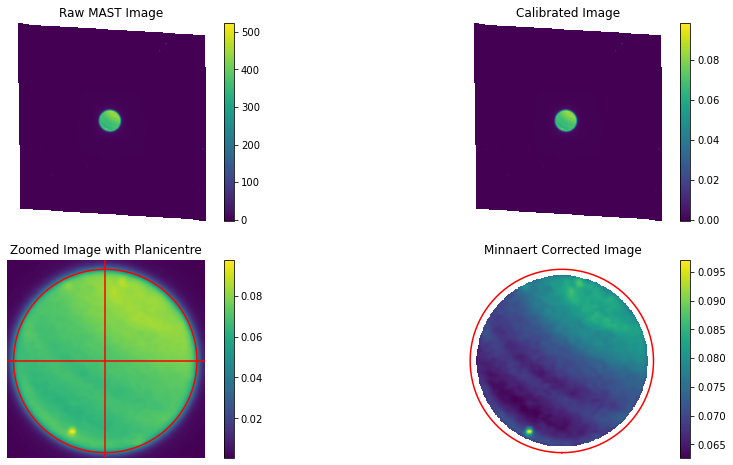

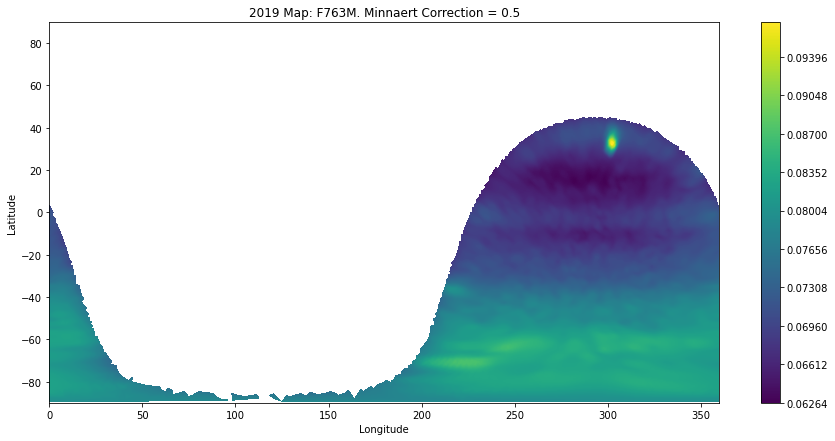

In [29]:
mfac = 0.5

img, hdr, scihdr = open_img('data/test/763_1_drz.fits')
eph = get_ephemerides(target='neptune',loc='hst',epoch=hdr['EXPSTART'])

IF, pltscl = calc_IF(eph['r'], hdr['PHOTFLAM'], 1541.91)

img = interp_image(img,4) #interpolate image to have higher resolution, rest of the block deals with the consequences of this
pltscl = pltscl/4

plt.figure(figsize=(15,8))
ax1 = plt.subplot(221)
im = ax1.imshow(img, cmap=col)
plt.title('Raw MAST Image')
plt.colorbar(im)
ax1.axis('off')

img = img*IF

ax2 = plt.subplot(222)
im2 = ax2.imshow(img, cmap=col)
plt.title('Calibrated Image')
plt.colorbar(im2)
ax2.axis('off')

rad = float(eph['ang_width'])/(2*pltscl)
img, y, x = circ(img,rad)
img, planicentre = get_planicentre(img,rad)

ax3 = plt.subplot(223)
im3 = ax3.imshow(img, cmap=col)
plt.title('Zoomed Image with Planicentre')
ax3.axhline(planicentre[1],color=xcol)
ax3.axvline(planicentre[0],color=xcol)
ax3.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im3)
ax3.axis('off')

img = minnaert(img, planicentre, mfac, eph)

ax4 = plt.subplot(224)
im4 = ax4.imshow(img, cmap=col)
plt.title('Minnaert Corrected Image')
#ax4.axhline(planicentre[1],color=xcol)
#ax4.axvline(planicentre[0],color=xcol)
ax4.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im4)
ax4.axis('off')

ang_corr = float(scihdr['ORIENTAT'])-float(eph['NPole_ang']) #the angle with which to correct the north pole of the image

mapped_img = map_observation(img, planicentre[0], planicentre[1], planicentre[2], ang_corr, eph['PDObsLon'], eph['PDObsLat'])

plt.figure(figsize=(15,7))
plt.contourf(mapped_img[1], mapped_img[2], mapped_img[0],levels=lvls)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('2019 Map: F763M. Minnaert Correction = '+str(mfac))
plt.colorbar()
plt.show()

flipped_img = np.flip(mapped_img[0],0)

#plt.figure(figsize=(15,14))
#ax1 = plt.subplot(211)
#ax1.imshow(mapped_img[0])
#ax2 = plt.subplot(212)
#ax2.imshow(flipped_img)
#plt.show()

#Save the Plot to a File
plt.figure(figsize=(15,7)) #saves the map to a .png to possibly be used in my report
plt.contourf(mapped_img[1], mapped_img[2], mapped_img[0],levels=lvls)
plt.axis('off')
plt.savefig('maps/OPALCyc26/763_1.png')
plt.close()

hdu = ast.PrimaryHDU(flipped_img) #saves the map to a fits image to be read by the reflectance plotter#
#hdu.writeto('maps/OPALCyc26/763_1.fits')

C:\Users\jamie\Documents\Uni Work\Year 4\PA4900 Specialist Research Project\CODE AHHHHHHH\Neptune from Scratch\IMAGE MAPPING\Final Mappings\tools\mapping.py:331: RuntimeWarning: invalid value encountered in sqrt
  z_img = np.sqrt(1 - x_img**2 - y_img**2)
C:\Users\jamie\Documents\Uni Work\Year 4\PA4900 Specialist Research Project\CODE AHHHHHHH\Neptune from Scratch\IMAGE MAPPING\Final Mappings\MapFunc.py:98: RuntimeWarning: invalid value encountered in sqrt
  img_corr = img/((mu**(k-1))*(mu0**k))
C:\Users\jamie\Documents\Uni Work\Year 4\PA4900 Specialist Research Project\CODE AHHHHHHH\Neptune from Scratch\IMAGE MAPPING\Final Mappings\tools\mapping.py:331: RuntimeWarning: invalid value encountered in sqrt
  z_img = np.sqrt(1 - x_img**2 - y_img**2)
C:\Users\jamie\Documents\Uni Work\Year 4\PA4900 Specialist Research Project\CODE AHHHHHHH\Neptune from Scratch\IMAGE MAPPING\Final Mappings\tools\mapping.py:527: RuntimeWarning: invalid value encountered in remainder
  long_img = long_img % (2*n

.


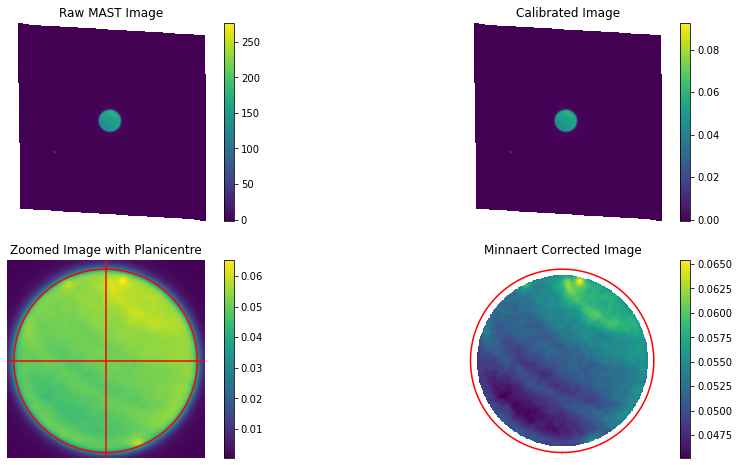

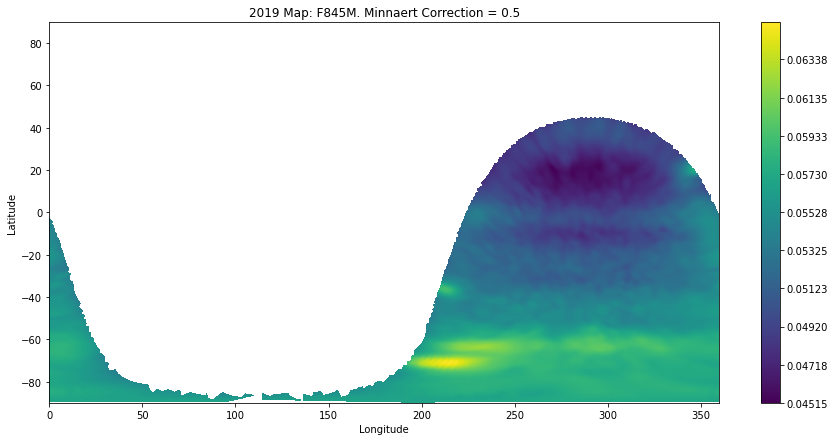

In [28]:
mfac = 0.5

img, hdr, scihdr = open_img('data/test/845_1_drz.fits')
eph = get_ephemerides(target='neptune',loc='hst',epoch=hdr['EXPSTART'])

IF, pltscl = calc_IF(eph['r'], hdr['PHOTFLAM'], 1023.65)

img = interp_image(img,4) #interpolate image to have higher resolution, rest of the block deals with the consequences of this
pltscl = pltscl/4

plt.figure(figsize=(15,8))
ax1 = plt.subplot(221)
im = ax1.imshow(img, cmap=col)
plt.title('Raw MAST Image')
plt.colorbar(im)
ax1.axis('off')

img = img*IF

ax2 = plt.subplot(222)
im2 = ax2.imshow(img, cmap=col)
plt.title('Calibrated Image')
plt.colorbar(im2)
ax2.axis('off')

rad = float(eph['ang_width'])/(2*pltscl)
img, y, x = circ(img,rad)
img, planicentre = get_planicentre(img,rad)

ax3 = plt.subplot(223)
im3 = ax3.imshow(img, cmap=col)
plt.title('Zoomed Image with Planicentre')
ax3.axhline(planicentre[1],color=xcol)
ax3.axvline(planicentre[0],color=xcol)
ax3.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im3)
ax3.axis('off')

img = minnaert(img, planicentre, mfac, eph)

ax4 = plt.subplot(224)
im4 = ax4.imshow(img, cmap=col)
plt.title('Minnaert Corrected Image')
#ax4.axhline(planicentre[1],color=xcol)
#ax4.axvline(planicentre[0],color=xcol)
ax4.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im4)
ax4.axis('off')

ang_corr = float(scihdr['ORIENTAT'])-float(eph['NPole_ang']) #the angle with which to correct the north pole of the image

mapped_img = map_observation(img, planicentre[0], planicentre[1], planicentre[2], ang_corr, eph['PDObsLon'], eph['PDObsLat'])

plt.figure(figsize=(15,7))
plt.contourf(mapped_img[1], mapped_img[2], mapped_img[0],levels=lvls)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('2019 Map: F845M. Minnaert Correction = '+str(mfac))
plt.colorbar()
plt.show()

flipped_img = np.flip(mapped_img[0],0)

#plt.figure(figsize=(15,14))
#ax1 = plt.subplot(211)
#ax1.imshow(mapped_img[0])
#ax2 = plt.subplot(212)
#ax2.imshow(flipped_img)
#plt.show()

#Save the Plot to a File
plt.figure(figsize=(15,7)) #saves the map to a .png to possibly be used in my report
plt.contourf(mapped_img[1], mapped_img[2], mapped_img[0],levels=lvls)
plt.axis('off')
plt.savefig('maps/OPALCyc26/845_1.png')
plt.close()

hdu = ast.PrimaryHDU(flipped_img) #saves the map to a fits image to be read by the reflectance plotter#
#hdu.writeto('maps/OPALCyc26/845_1.fits')

# Reflectance Tabulator

In [9]:
#This cell imports the required modules to the notebook
#RUN THIS CELL BEFORE ANY OTHER CODE IS RUN
import matplotlib.pyplot as plt     #imports graph plotting library
import astropy.io.fits as ast       #imports FITS manipulation library
import numpy as np                  #imports numerical manipulation library
import random                       #imports module to generate random numbers for monte carlo error propagation
import csv

#magic function that forces plots to appear in this notebook
%matplotlib inline                  
plt.ion()                           #function that loads plotting library in "interactive mode"

from astropy.utils.data import get_pkg_data_filename   #imports function to get filename of data file
from scipy.stats import sem

print("Required Libraries Loaded Successfully")

def graderr(R, err, n): #user defined function does monte carlo error propagation
    """
    function for calculating the error in the gradient, using a monte carlo error propagation philosophy
    """
    grads = [[] for count in range(n)]                 #initialises list of lists, with indices [iteration][latitude]
    for i in range(n):                                 #loops through randomisation process n times
        randR = np.zeros(len(R))                       #initialises list of random R values
        for j in range(len(R)):                        #loops through the random function to form the list
            randR[j] = random.uniform(R[j]-err[j], R[j]+err[j]) #generates random number within bounds of error bars
        grads[i] = np.gradient(randR)                  #finds the gradient of the random R list generated above
        
    graderr = np.zeros(len(R))                         #initialises the list of gradient errors
    for i in range(len(R)):                            #loops through list of error calculation from the lists of random R
        gradforpoint = np.zeros(n)                     #initialises restructured list of iterations of grad, index [latitude]
        for j in range(n):                             #loops through the iterations
            gradforpoint[j] = grads[j][i]              #gets the gradR error through each iteration and makes a new list from it
        graderr[i] = (max(gradforpoint)-min(gradforpoint))/2 #calculates error by finding the mean of the max and min errors
    return(graderr)                                    #returns list of errors

from RefFunc import *
print("User-Defined Functions Loaded Successfully")

latlimits = [40,-90] #values for latitude chosen
degpererrbar = 1    #chosen
print("Graphical Parameters Initialised")

Required Libraries Loaded Successfully
User-Defined Functions Loaded Successfully
Graphical Parameters Initialised


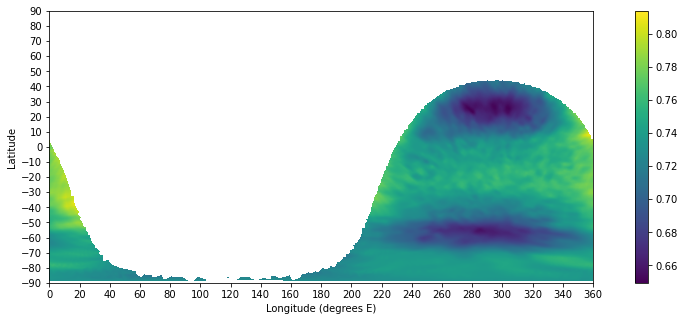

Please input the leftmost longitude of the range desired: 260
Please input the rightmost longitude of the range desired: 320


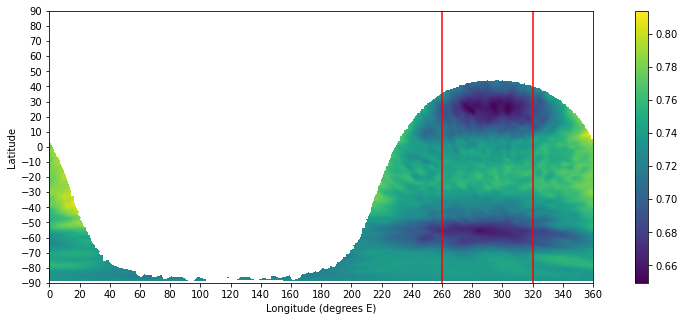

Is this longitude range appropriate? (y/n): y


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:233: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:194: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


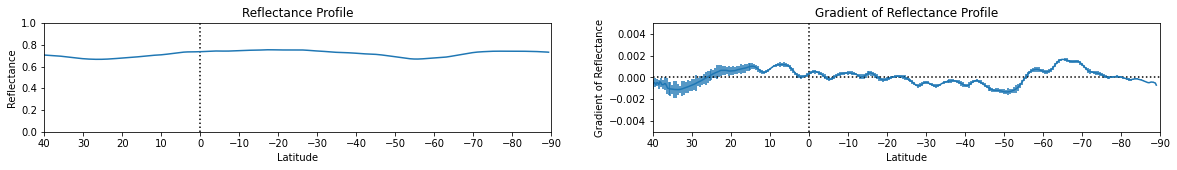

Data Successfully Written to: plotdata/test_467.csv


In [10]:
good = False
file = get_pkg_data_filename('maps/OPALCyc26/467_1.fits')
data = ast.getdata(file,ext=0)
resolution = data.shape

lat = -1*(((180/resolution[0])*np.arange(resolution[0]))-90)
latticks = [-90,-80,-70,-60,-50,-40,-30,-20,-10,0,10,20,30,40,50,60,70,80,90]

long = (360/resolution[1])*np.arange(resolution[1])
longticks = [0,20,40,60,80,100,120,140,160,180,200,220,240,260,280,300,320,340,360]

fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(111)
im1 = ax1.imshow(data, cmap='viridis', extent=[0,360,-90,90])
plt.xlabel("Longitude (degrees E)")
plt.ylabel("Latitude")
plt.xticks(longticks)
plt.yticks(latticks)
plt.colorbar(im1)
plt.show()

while good == False:
    left = float(input('Please input the leftmost longitude of the range desired: '))
    right = float(input('Please input the rightmost longitude of the range desired: '))
    fig = plt.figure(figsize=(15,5))
    ax1 = fig.add_subplot(111)
    im1 = ax1.imshow(data, cmap='viridis', extent=[0,360,-90,90])
    plt.xlabel("Longitude (degrees E)")
    plt.ylabel("Latitude")
    plt.xticks(longticks)
    plt.yticks(latticks)
    plt.colorbar(im1)
    ax1.axvline(left,color='red')
    ax1.axvline(right,color='red')
    plt.show()
    
    happy = str(input('Is this longitude range appropriate? (y/n): '))
    if happy == 'y':
        good = True

img = restrict_long(data,long_to_res(resolution[1],long,right),long_to_res(resolution[1],long,left))

# This code block is a debug tool, shows the extracted longitude region of the image
# fig = plt.figure(figsize=(15,5))
# ax1 = fig.add_subplot(111)
# im1 = ax1.imshow(img, cmap='viridis')
# plt.colorbar(im1)
# plt.show()
    
R = np.zeros(img.shape[0])
Rsem = np.zeros(img.shape[0])
for j in range(img.shape[0]): 
    R[j] = np.mean(img[j][np.where(np.isnan(img[j])==False)])
    Rsem[j] = sem(img[j][np.where(np.isnan(img[j])==False)])
R = R
GradR = np.gradient(R)
Rsem = Rsem
GradRErr = graderr(R,Rsem,10)

plt.figure(figsize=(20,2)) #set up a figure space
axR = plt.subplot(121) #create a set of axes within the figure
axR.errorbar(lat, R, yerr = Rsem, errorevery = degpererrbar*2)
plt.title('Reflectance Profile')
plt.xticks(latticks)
plt.xlabel('Latitude')
plt.xlim(latlimits) #latitude limit setting
plt.ylabel('Reflectance')
plt.ylim([0,1]) #reflectance limit setting
plt.axvline(x=0, color='black', ls=':') #plots line at neptunian equator

axR = plt.subplot(122) #create a set of axes within the figure
axR.errorbar(lat, GradR, yerr=GradRErr, errorevery = degpererrbar*2)
plt.title('Gradient of Reflectance Profile')
plt.xticks(latticks)
plt.xlabel('Latitude')
plt.xlim(latlimits) #latitude limit setting
plt.ylabel('Gradient of Reflectance')
plt.ylim([-0.005,0.005]) #reflectance limit setting
plt.axhline(y=0, color='black', ls=':')
plt.axvline(x=0, color='black', ls=':') #plots line at neptunian equator
plt.show()

rows = []

for i in range(len(R)):
    rows.append([R[i],GradR[i],Rsem[i],GradRErr[i],lat[i]])

csv_loc = 'plotdata/test_467.csv'
with open(csv_loc, mode='w') as file:       
    writer = csv.writer(file, delimiter=',')

    for i in range(len(rows)):
        writer.writerow(rows[i])
print('Data Successfully Written to:',csv_loc)

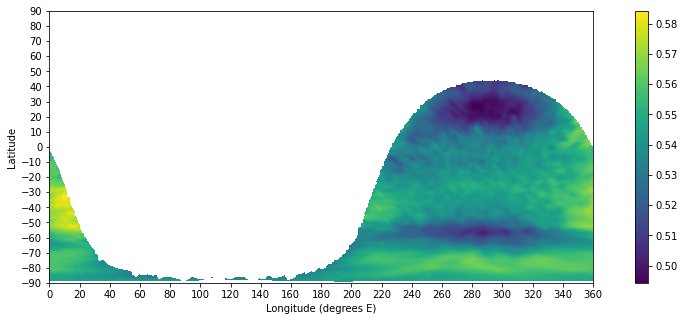

Please input the leftmost longitude of the range desired: 260
Please input the rightmost longitude of the range desired: 320


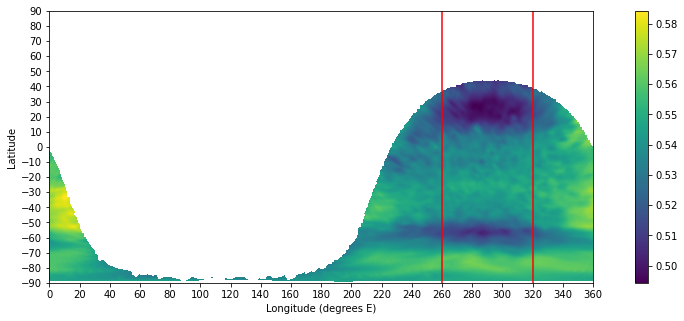

Is this longitude range appropriate? (y/n): y


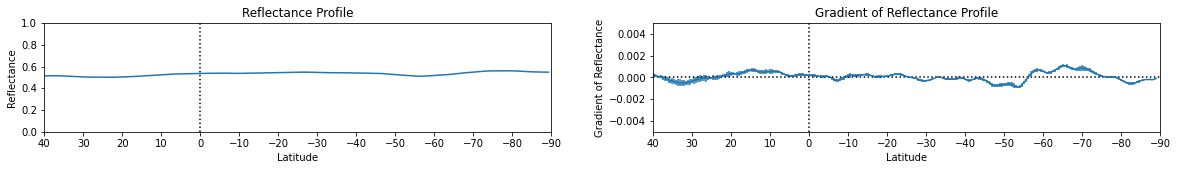

Data Successfully Written to: plotdata/test_547.csv


In [11]:
good = False
file = get_pkg_data_filename('maps/OPALCyc26/547_1.fits')
data = ast.getdata(file,ext=0)
resolution = data.shape

lat = -1*(((180/resolution[0])*np.arange(resolution[0]))-90)
latticks = [-90,-80,-70,-60,-50,-40,-30,-20,-10,0,10,20,30,40,50,60,70,80,90]

long = (360/resolution[1])*np.arange(resolution[1])
longticks = [0,20,40,60,80,100,120,140,160,180,200,220,240,260,280,300,320,340,360]

fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(111)
im1 = ax1.imshow(data, cmap='viridis', extent=[0,360,-90,90])
plt.xlabel("Longitude (degrees E)")
plt.ylabel("Latitude")
plt.xticks(longticks)
plt.yticks(latticks)
plt.colorbar(im1)
plt.show()

while good == False:
    left = float(input('Please input the leftmost longitude of the range desired: '))
    right = float(input('Please input the rightmost longitude of the range desired: '))
    fig = plt.figure(figsize=(15,5))
    ax1 = fig.add_subplot(111)
    im1 = ax1.imshow(data, cmap='viridis', extent=[0,360,-90,90])
    plt.xlabel("Longitude (degrees E)")
    plt.ylabel("Latitude")
    plt.xticks(longticks)
    plt.yticks(latticks)
    plt.colorbar(im1)
    ax1.axvline(left,color='red')
    ax1.axvline(right,color='red')
    plt.show()
    
    happy = str(input('Is this longitude range appropriate? (y/n): '))
    if happy == 'y':
        good = True

img = restrict_long(data,long_to_res(resolution[1],long,right),long_to_res(resolution[1],long,left))

# This code block is a debug tool, shows the extracted longitude region of the image
# fig = plt.figure(figsize=(15,5))
# ax1 = fig.add_subplot(111)
# im1 = ax1.imshow(img, cmap='viridis')
# plt.colorbar(im1)
# plt.show()
    
R = np.zeros(img.shape[0])
Rsem = np.zeros(img.shape[0])
for j in range(img.shape[0]): 
    R[j] = np.mean(img[j][np.where(np.isnan(img[j])==False)])
    Rsem[j] = sem(img[j][np.where(np.isnan(img[j])==False)])
R = R
GradR = np.gradient(R)
Rsem = Rsem
GradRErr = graderr(R,Rsem,10)

plt.figure(figsize=(20,2)) #set up a figure space
axR = plt.subplot(121) #create a set of axes within the figure
axR.errorbar(lat, R, yerr = Rsem, errorevery = degpererrbar*2)
plt.title('Reflectance Profile')
plt.xticks(latticks)
plt.xlabel('Latitude')
plt.xlim(latlimits) #latitude limit setting
plt.ylabel('Reflectance')
plt.ylim([0,1]) #reflectance limit setting
plt.axvline(x=0, color='black', ls=':') #plots line at neptunian equator

axR = plt.subplot(122) #create a set of axes within the figure
axR.errorbar(lat, GradR, yerr=GradRErr, errorevery = degpererrbar*2)
plt.title('Gradient of Reflectance Profile')
plt.xticks(latticks)
plt.xlabel('Latitude')
plt.xlim(latlimits) #latitude limit setting
plt.ylabel('Gradient of Reflectance')
plt.ylim([-0.005,0.005]) #reflectance limit setting
plt.axhline(y=0, color='black', ls=':')
plt.axvline(x=0, color='black', ls=':') #plots line at neptunian equator
plt.show()

rows = []

for i in range(len(R)):
    rows.append([R[i],GradR[i],Rsem[i],GradRErr[i],lat[i]])

csv_loc = 'plotdata/test_547.csv'
with open(csv_loc, mode='w') as file:       
    writer = csv.writer(file, delimiter=',')

    for i in range(len(rows)):
        writer.writerow(rows[i])
print('Data Successfully Written to:',csv_loc)

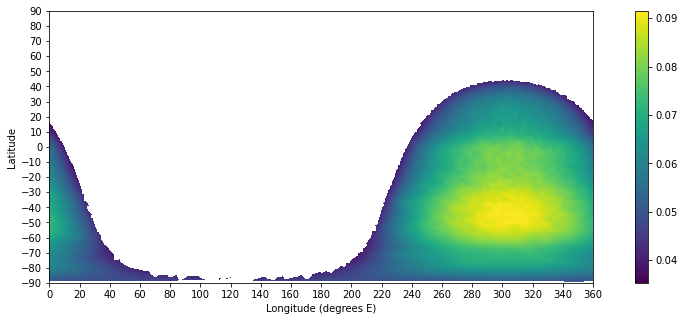

Please input the leftmost longitude of the range desired: 260
Please input the rightmost longitude of the range desired: 320


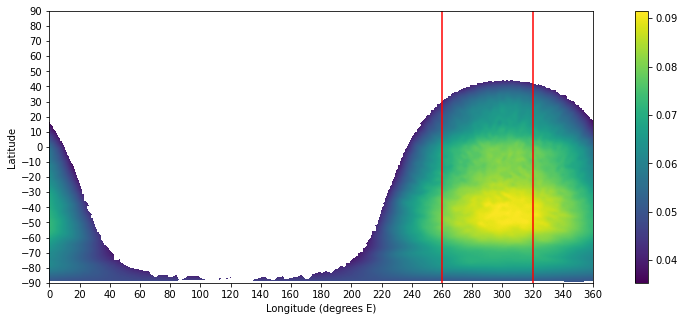

Is this longitude range appropriate? (y/n): y


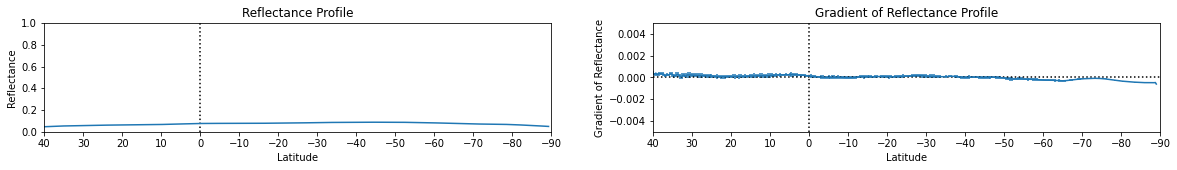

Data Successfully Written to: plotdata/test_619.csv


In [12]:
good = False
file = get_pkg_data_filename('maps/OPALCyc26/619_1.fits')
data = ast.getdata(file,ext=0)
resolution = data.shape

lat = -1*(((180/resolution[0])*np.arange(resolution[0]))-90)
latticks = [-90,-80,-70,-60,-50,-40,-30,-20,-10,0,10,20,30,40,50,60,70,80,90]

long = (360/resolution[1])*np.arange(resolution[1])
longticks = [0,20,40,60,80,100,120,140,160,180,200,220,240,260,280,300,320,340,360]

fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(111)
im1 = ax1.imshow(data, cmap='viridis', extent=[0,360,-90,90])
plt.xlabel("Longitude (degrees E)")
plt.ylabel("Latitude")
plt.xticks(longticks)
plt.yticks(latticks)
plt.colorbar(im1)
plt.show()

while good == False:
    left = float(input('Please input the leftmost longitude of the range desired: '))
    right = float(input('Please input the rightmost longitude of the range desired: '))
    fig = plt.figure(figsize=(15,5))
    ax1 = fig.add_subplot(111)
    im1 = ax1.imshow(data, cmap='viridis', extent=[0,360,-90,90])
    plt.xlabel("Longitude (degrees E)")
    plt.ylabel("Latitude")
    plt.xticks(longticks)
    plt.yticks(latticks)
    plt.colorbar(im1)
    ax1.axvline(left,color='red')
    ax1.axvline(right,color='red')
    plt.show()
    
    happy = str(input('Is this longitude range appropriate? (y/n): '))
    if happy == 'y':
        good = True

img = restrict_long(data,long_to_res(resolution[1],long,right),long_to_res(resolution[1],long,left))

# This code block is a debug tool, shows the extracted longitude region of the image
# fig = plt.figure(figsize=(15,5))
# ax1 = fig.add_subplot(111)
# im1 = ax1.imshow(img, cmap='viridis')
# plt.colorbar(im1)
# plt.show()
    
R = np.zeros(img.shape[0])
Rsem = np.zeros(img.shape[0])
for j in range(img.shape[0]): 
    R[j] = np.mean(img[j][np.where(np.isnan(img[j])==False)])
    Rsem[j] = sem(img[j][np.where(np.isnan(img[j])==False)])
R = R
GradR = np.gradient(R)
Rsem = Rsem
GradRErr = graderr(R,Rsem,10)

plt.figure(figsize=(20,2)) #set up a figure space
axR = plt.subplot(121) #create a set of axes within the figure
axR.errorbar(lat, R, yerr = Rsem, errorevery = degpererrbar*2)
plt.title('Reflectance Profile')
plt.xticks(latticks)
plt.xlabel('Latitude')
plt.xlim(latlimits) #latitude limit setting
plt.ylabel('Reflectance')
plt.ylim([0,1]) #reflectance limit setting
plt.axvline(x=0, color='black', ls=':') #plots line at neptunian equator

axR = plt.subplot(122) #create a set of axes within the figure
axR.errorbar(lat, GradR, yerr=GradRErr, errorevery = degpererrbar*2)
plt.title('Gradient of Reflectance Profile')
plt.xticks(latticks)
plt.xlabel('Latitude')
plt.xlim(latlimits) #latitude limit setting
plt.ylabel('Gradient of Reflectance')
plt.ylim([-0.005,0.005]) #reflectance limit setting
plt.axhline(y=0, color='black', ls=':')
plt.axvline(x=0, color='black', ls=':') #plots line at neptunian equator
plt.show()

rows = []

for i in range(len(R)):
    rows.append([R[i],GradR[i],Rsem[i],GradRErr[i],lat[i]])

csv_loc = 'plotdata/test_619.csv'
with open(csv_loc, mode='w') as file:       
    writer = csv.writer(file, delimiter=',')

    for i in range(len(rows)):
        writer.writerow(rows[i])
print('Data Successfully Written to:',csv_loc)

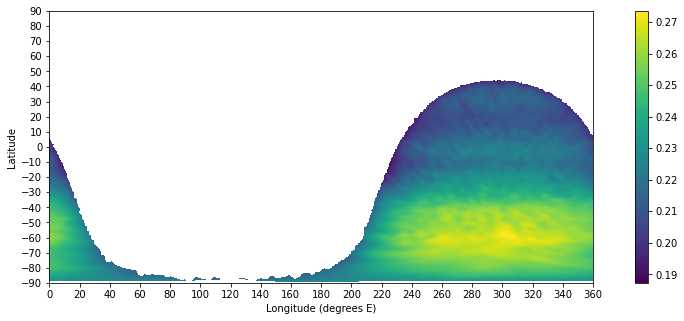

Please input the leftmost longitude of the range desired: 260
Please input the rightmost longitude of the range desired: 320


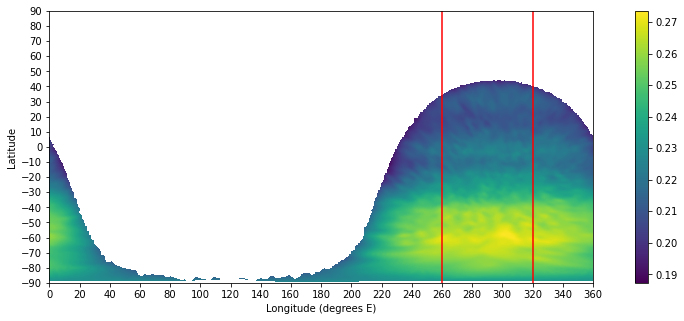

Is this longitude range appropriate? (y/n): y


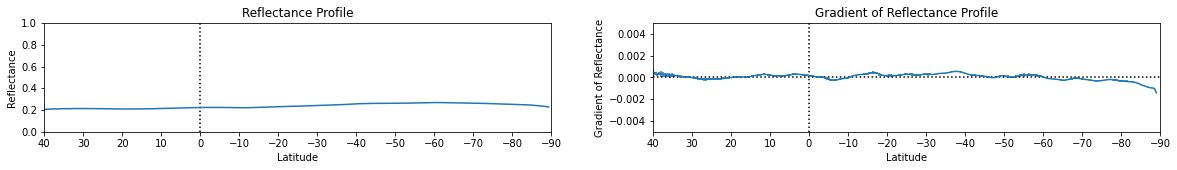

Data Successfully Written to: plotdata/test_657.csv


In [13]:
good = False
file = get_pkg_data_filename('maps/OPALCyc26/657_1.fits')
data = ast.getdata(file,ext=0)
resolution = data.shape

lat = -1*(((180/resolution[0])*np.arange(resolution[0]))-90)
latticks = [-90,-80,-70,-60,-50,-40,-30,-20,-10,0,10,20,30,40,50,60,70,80,90]

long = (360/resolution[1])*np.arange(resolution[1])
longticks = [0,20,40,60,80,100,120,140,160,180,200,220,240,260,280,300,320,340,360]

fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(111)
im1 = ax1.imshow(data, cmap='viridis', extent=[0,360,-90,90])
plt.xlabel("Longitude (degrees E)")
plt.ylabel("Latitude")
plt.xticks(longticks)
plt.yticks(latticks)
plt.colorbar(im1)
plt.show()

while good == False:
    left = float(input('Please input the leftmost longitude of the range desired: '))
    right = float(input('Please input the rightmost longitude of the range desired: '))
    fig = plt.figure(figsize=(15,5))
    ax1 = fig.add_subplot(111)
    im1 = ax1.imshow(data, cmap='viridis', extent=[0,360,-90,90])
    plt.xlabel("Longitude (degrees E)")
    plt.ylabel("Latitude")
    plt.xticks(longticks)
    plt.yticks(latticks)
    plt.colorbar(im1)
    ax1.axvline(left,color='red')
    ax1.axvline(right,color='red')
    plt.show()
    
    happy = str(input('Is this longitude range appropriate? (y/n): '))
    if happy == 'y':
        good = True

img = restrict_long(data,long_to_res(resolution[1],long,right),long_to_res(resolution[1],long,left))

# This code block is a debug tool, shows the extracted longitude region of the image
# fig = plt.figure(figsize=(15,5))
# ax1 = fig.add_subplot(111)
# im1 = ax1.imshow(img, cmap='viridis')
# plt.colorbar(im1)
# plt.show()
    
R = np.zeros(img.shape[0])
Rsem = np.zeros(img.shape[0])
for j in range(img.shape[0]): 
    R[j] = np.mean(img[j][np.where(np.isnan(img[j])==False)])
    Rsem[j] = sem(img[j][np.where(np.isnan(img[j])==False)])
R = R
GradR = np.gradient(R)
Rsem = Rsem
GradRErr = graderr(R,Rsem,10)

plt.figure(figsize=(20,2)) #set up a figure space
axR = plt.subplot(121) #create a set of axes within the figure
axR.errorbar(lat, R, yerr = Rsem, errorevery = degpererrbar*2)
plt.title('Reflectance Profile')
plt.xticks(latticks)
plt.xlabel('Latitude')
plt.xlim(latlimits) #latitude limit setting
plt.ylabel('Reflectance')
plt.ylim([0,1]) #reflectance limit setting
plt.axvline(x=0, color='black', ls=':') #plots line at neptunian equator

axR = plt.subplot(122) #create a set of axes within the figure
axR.errorbar(lat, GradR, yerr=GradRErr, errorevery = degpererrbar*2)
plt.title('Gradient of Reflectance Profile')
plt.xticks(latticks)
plt.xlabel('Latitude')
plt.xlim(latlimits) #latitude limit setting
plt.ylabel('Gradient of Reflectance')
plt.ylim([-0.005,0.005]) #reflectance limit setting
plt.axhline(y=0, color='black', ls=':')
plt.axvline(x=0, color='black', ls=':') #plots line at neptunian equator
plt.show()

rows = []

for i in range(len(R)):
    rows.append([R[i],GradR[i],Rsem[i],GradRErr[i],lat[i]])

csv_loc = 'plotdata/test_657.csv'
with open(csv_loc, mode='w') as file:       
    writer = csv.writer(file, delimiter=',')

    for i in range(len(rows)):
        writer.writerow(rows[i])
print('Data Successfully Written to:',csv_loc)

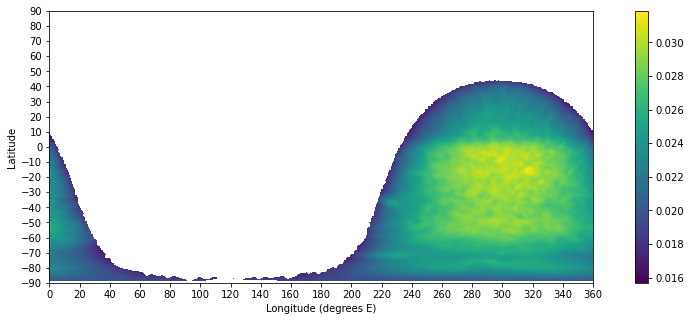

Please input the leftmost longitude of the range desired: 260
Please input the rightmost longitude of the range desired: 320


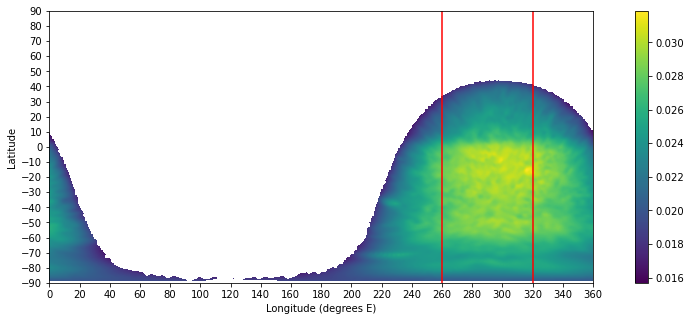

Is this longitude range appropriate? (y/n): y


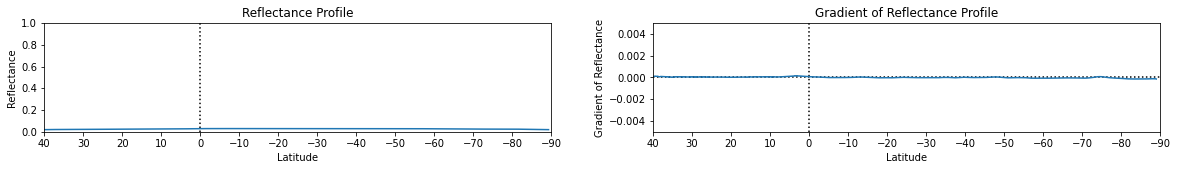

Data Successfully Written to: plotdata/test_727.csv


In [14]:
good = False
file = get_pkg_data_filename('maps/OPALCyc26/727_1.fits')
data = ast.getdata(file,ext=0)
resolution = data.shape

lat = -1*(((180/resolution[0])*np.arange(resolution[0]))-90)
latticks = [-90,-80,-70,-60,-50,-40,-30,-20,-10,0,10,20,30,40,50,60,70,80,90]

long = (360/resolution[1])*np.arange(resolution[1])
longticks = [0,20,40,60,80,100,120,140,160,180,200,220,240,260,280,300,320,340,360]

fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(111)
im1 = ax1.imshow(data, cmap='viridis', extent=[0,360,-90,90])
plt.xlabel("Longitude (degrees E)")
plt.ylabel("Latitude")
plt.xticks(longticks)
plt.yticks(latticks)
plt.colorbar(im1)
plt.show()

while good == False:
    left = float(input('Please input the leftmost longitude of the range desired: '))
    right = float(input('Please input the rightmost longitude of the range desired: '))
    fig = plt.figure(figsize=(15,5))
    ax1 = fig.add_subplot(111)
    im1 = ax1.imshow(data, cmap='viridis', extent=[0,360,-90,90])
    plt.xlabel("Longitude (degrees E)")
    plt.ylabel("Latitude")
    plt.xticks(longticks)
    plt.yticks(latticks)
    plt.colorbar(im1)
    ax1.axvline(left,color='red')
    ax1.axvline(right,color='red')
    plt.show()
    
    happy = str(input('Is this longitude range appropriate? (y/n): '))
    if happy == 'y':
        good = True

img = restrict_long(data,long_to_res(resolution[1],long,right),long_to_res(resolution[1],long,left))

# This code block is a debug tool, shows the extracted longitude region of the image
# fig = plt.figure(figsize=(15,5))
# ax1 = fig.add_subplot(111)
# im1 = ax1.imshow(img, cmap='viridis')
# plt.colorbar(im1)
# plt.show()
    
R = np.zeros(img.shape[0])
Rsem = np.zeros(img.shape[0])
for j in range(img.shape[0]): 
    R[j] = np.mean(img[j][np.where(np.isnan(img[j])==False)])
    Rsem[j] = sem(img[j][np.where(np.isnan(img[j])==False)])
R = R
GradR = np.gradient(R)
Rsem = Rsem
GradRErr = graderr(R,Rsem,10)

plt.figure(figsize=(20,2)) #set up a figure space
axR = plt.subplot(121) #create a set of axes within the figure
axR.errorbar(lat, R, yerr = Rsem, errorevery = degpererrbar*2)
plt.title('Reflectance Profile')
plt.xticks(latticks)
plt.xlabel('Latitude')
plt.xlim(latlimits) #latitude limit setting
plt.ylabel('Reflectance')
plt.ylim([0,1]) #reflectance limit setting
plt.axvline(x=0, color='black', ls=':') #plots line at neptunian equator

axR = plt.subplot(122) #create a set of axes within the figure
axR.errorbar(lat, GradR, yerr=GradRErr, errorevery = degpererrbar*2)
plt.title('Gradient of Reflectance Profile')
plt.xticks(latticks)
plt.xlabel('Latitude')
plt.xlim(latlimits) #latitude limit setting
plt.ylabel('Gradient of Reflectance')
plt.ylim([-0.005,0.005]) #reflectance limit setting
plt.axhline(y=0, color='black', ls=':')
plt.axvline(x=0, color='black', ls=':') #plots line at neptunian equator
plt.show()

rows = []

for i in range(len(R)):
    rows.append([R[i],GradR[i],Rsem[i],GradRErr[i],lat[i]])

csv_loc = 'plotdata/test_727.csv'
with open(csv_loc, mode='w') as file:       
    writer = csv.writer(file, delimiter=',')

    for i in range(len(rows)):
        writer.writerow(rows[i])
print('Data Successfully Written to:',csv_loc)

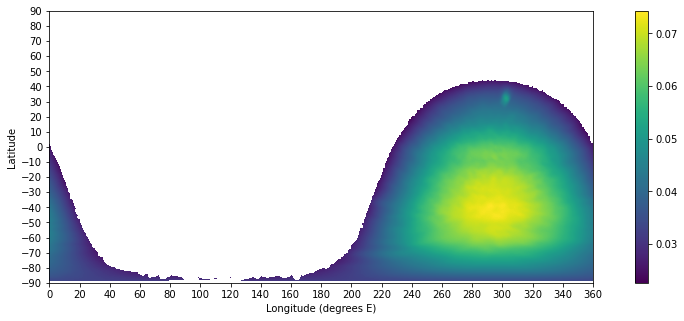

Please input the leftmost longitude of the range desired: 260
Please input the rightmost longitude of the range desired: 320


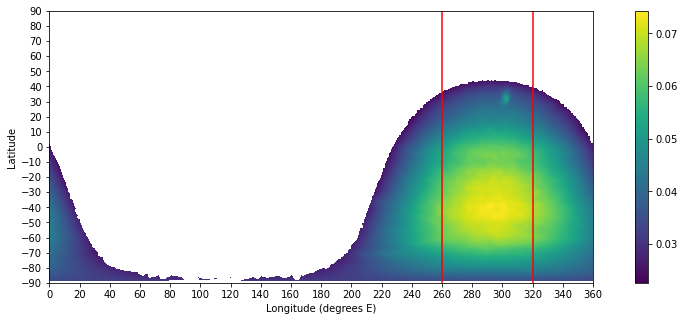

Is this longitude range appropriate? (y/n): y


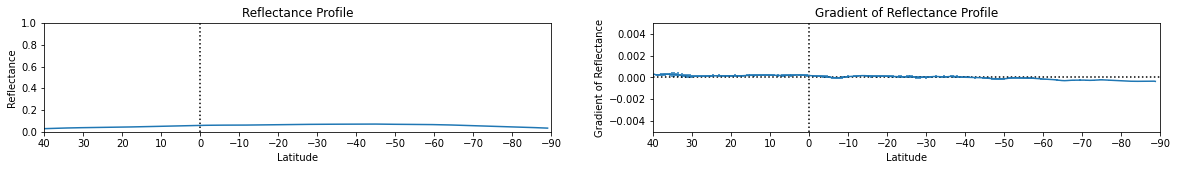

Data Successfully Written to: plotdata/test_763.csv


In [15]:
good = False
file = get_pkg_data_filename('maps/OPALCyc26/763_1.fits')
data = ast.getdata(file,ext=0)
resolution = data.shape

lat = -1*(((180/resolution[0])*np.arange(resolution[0]))-90)
latticks = [-90,-80,-70,-60,-50,-40,-30,-20,-10,0,10,20,30,40,50,60,70,80,90]

long = (360/resolution[1])*np.arange(resolution[1])
longticks = [0,20,40,60,80,100,120,140,160,180,200,220,240,260,280,300,320,340,360]

fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(111)
im1 = ax1.imshow(data, cmap='viridis', extent=[0,360,-90,90])
plt.xlabel("Longitude (degrees E)")
plt.ylabel("Latitude")
plt.xticks(longticks)
plt.yticks(latticks)
plt.colorbar(im1)
plt.show()

while good == False:
    left = float(input('Please input the leftmost longitude of the range desired: '))
    right = float(input('Please input the rightmost longitude of the range desired: '))
    fig = plt.figure(figsize=(15,5))
    ax1 = fig.add_subplot(111)
    im1 = ax1.imshow(data, cmap='viridis', extent=[0,360,-90,90])
    plt.xlabel("Longitude (degrees E)")
    plt.ylabel("Latitude")
    plt.xticks(longticks)
    plt.yticks(latticks)
    plt.colorbar(im1)
    ax1.axvline(left,color='red')
    ax1.axvline(right,color='red')
    plt.show()
    
    happy = str(input('Is this longitude range appropriate? (y/n): '))
    if happy == 'y':
        good = True

img = restrict_long(data,long_to_res(resolution[1],long,right),long_to_res(resolution[1],long,left))

# This code block is a debug tool, shows the extracted longitude region of the image
# fig = plt.figure(figsize=(15,5))
# ax1 = fig.add_subplot(111)
# im1 = ax1.imshow(img, cmap='viridis')
# plt.colorbar(im1)
# plt.show()
    
R = np.zeros(img.shape[0])
Rsem = np.zeros(img.shape[0])
for j in range(img.shape[0]): 
    R[j] = np.mean(img[j][np.where(np.isnan(img[j])==False)])
    Rsem[j] = sem(img[j][np.where(np.isnan(img[j])==False)])
R = R
GradR = np.gradient(R)
Rsem = Rsem
GradRErr = graderr(R,Rsem,10)

plt.figure(figsize=(20,2)) #set up a figure space
axR = plt.subplot(121) #create a set of axes within the figure
axR.errorbar(lat, R, yerr = Rsem, errorevery = degpererrbar*2)
plt.title('Reflectance Profile')
plt.xticks(latticks)
plt.xlabel('Latitude')
plt.xlim(latlimits) #latitude limit setting
plt.ylabel('Reflectance')
plt.ylim([0,1]) #reflectance limit setting
plt.axvline(x=0, color='black', ls=':') #plots line at neptunian equator

axR = plt.subplot(122) #create a set of axes within the figure
axR.errorbar(lat, GradR, yerr=GradRErr, errorevery = degpererrbar*2)
plt.title('Gradient of Reflectance Profile')
plt.xticks(latticks)
plt.xlabel('Latitude')
plt.xlim(latlimits) #latitude limit setting
plt.ylabel('Gradient of Reflectance')
plt.ylim([-0.005,0.005]) #reflectance limit setting
plt.axhline(y=0, color='black', ls=':')
plt.axvline(x=0, color='black', ls=':') #plots line at neptunian equator
plt.show()

rows = []

for i in range(len(R)):
    rows.append([R[i],GradR[i],Rsem[i],GradRErr[i],lat[i]])

csv_loc = 'plotdata/test_763.csv'
with open(csv_loc, mode='w') as file:       
    writer = csv.writer(file, delimiter=',')

    for i in range(len(rows)):
        writer.writerow(rows[i])
print('Data Successfully Written to:',csv_loc)

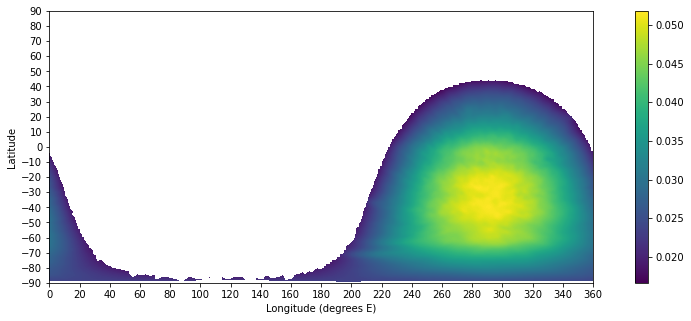

Please input the leftmost longitude of the range desired: 260
Please input the rightmost longitude of the range desired: 320


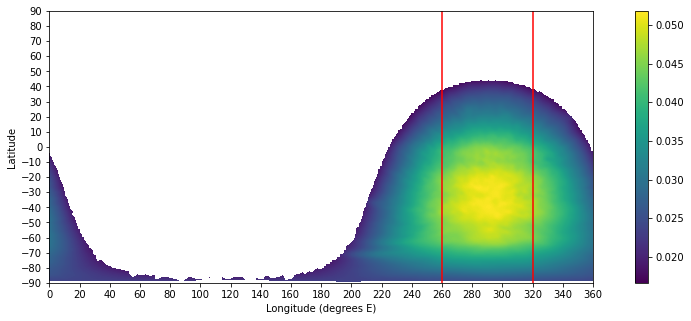

Is this longitude range appropriate? (y/n): y


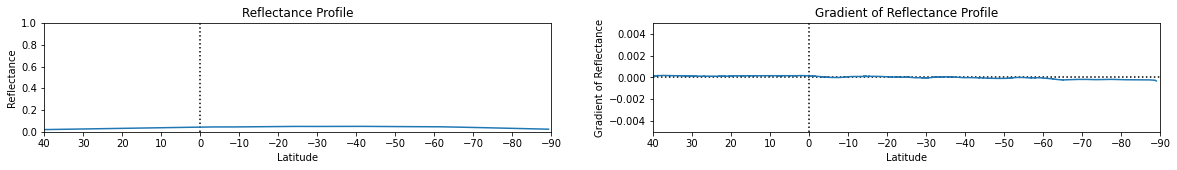

Data Successfully Written to: plotdata/test_845.csv


In [16]:
good = False
file = get_pkg_data_filename('maps/OPALCyc26/845_1.fits')
data = ast.getdata(file,ext=0)
resolution = data.shape

lat = -1*(((180/resolution[0])*np.arange(resolution[0]))-90)
latticks = [-90,-80,-70,-60,-50,-40,-30,-20,-10,0,10,20,30,40,50,60,70,80,90]

long = (360/resolution[1])*np.arange(resolution[1])
longticks = [0,20,40,60,80,100,120,140,160,180,200,220,240,260,280,300,320,340,360]

fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(111)
im1 = ax1.imshow(data, cmap='viridis', extent=[0,360,-90,90])
plt.xlabel("Longitude (degrees E)")
plt.ylabel("Latitude")
plt.xticks(longticks)
plt.yticks(latticks)
plt.colorbar(im1)
plt.show()

while good == False:
    left = float(input('Please input the leftmost longitude of the range desired: '))
    right = float(input('Please input the rightmost longitude of the range desired: '))
    fig = plt.figure(figsize=(15,5))
    ax1 = fig.add_subplot(111)
    im1 = ax1.imshow(data, cmap='viridis', extent=[0,360,-90,90])
    plt.xlabel("Longitude (degrees E)")
    plt.ylabel("Latitude")
    plt.xticks(longticks)
    plt.yticks(latticks)
    plt.colorbar(im1)
    ax1.axvline(left,color='red')
    ax1.axvline(right,color='red')
    plt.show()
    
    happy = str(input('Is this longitude range appropriate? (y/n): '))
    if happy == 'y':
        good = True

img = restrict_long(data,long_to_res(resolution[1],long,right),long_to_res(resolution[1],long,left))

# This code block is a debug tool, shows the extracted longitude region of the image
# fig = plt.figure(figsize=(15,5))
# ax1 = fig.add_subplot(111)
# im1 = ax1.imshow(img, cmap='viridis')
# plt.colorbar(im1)
# plt.show()
    
R = np.zeros(img.shape[0])
Rsem = np.zeros(img.shape[0])
for j in range(img.shape[0]): 
    R[j] = np.mean(img[j][np.where(np.isnan(img[j])==False)])
    Rsem[j] = sem(img[j][np.where(np.isnan(img[j])==False)])
R = R
GradR = np.gradient(R)
Rsem = Rsem
GradRErr = graderr(R,Rsem,10)

plt.figure(figsize=(20,2)) #set up a figure space
axR = plt.subplot(121) #create a set of axes within the figure
axR.errorbar(lat, R, yerr = Rsem, errorevery = degpererrbar*2)
plt.title('Reflectance Profile')
plt.xticks(latticks)
plt.xlabel('Latitude')
plt.xlim(latlimits) #latitude limit setting
plt.ylabel('Reflectance')
plt.ylim([0,1]) #reflectance limit setting
plt.axvline(x=0, color='black', ls=':') #plots line at neptunian equator

axR = plt.subplot(122) #create a set of axes within the figure
axR.errorbar(lat, GradR, yerr=GradRErr, errorevery = degpererrbar*2)
plt.title('Gradient of Reflectance Profile')
plt.xticks(latticks)
plt.xlabel('Latitude')
plt.xlim(latlimits) #latitude limit setting
plt.ylabel('Gradient of Reflectance')
plt.ylim([-0.005,0.005]) #reflectance limit setting
plt.axhline(y=0, color='black', ls=':')
plt.axvline(x=0, color='black', ls=':') #plots line at neptunian equator
plt.show()

rows = []

for i in range(len(R)):
    rows.append([R[i],GradR[i],Rsem[i],GradRErr[i],lat[i]])

csv_loc = 'plotdata/test_845.csv'
with open(csv_loc, mode='w') as file:       
    writer = csv.writer(file, delimiter=',')

    for i in range(len(rows)):
        writer.writerow(rows[i])
print('Data Successfully Written to:',csv_loc)

# Plotter

In [3]:
import csv
import matplotlib.pyplot as plt
import numpy as np

latlimits = [40,-90] #values for latitude chosen
degpererrbar = 1    #chosen
latticks = [-90,-80,-70,-60,-50,-40,-30,-20,-10,0,10,20,30,40,50,60,70,80,90]
colours = plt.cm.plasma(np.linspace(0,1,7))
#print(colours)
#colours = ['black','grey','red','orangered','peru','orange','yellow','lawngreen','green','teal','cyan','dodgerblue','blue','indigo','violet','deeppink']
print("Graphical Parameters Initialised")

Graphical Parameters Initialised


In [6]:
file = 'test_467.csv'
R = []
GradR = []
Rsem = []
GradRErr = []
lat = []
rows = []


with open('plotdata/'+file) as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 1
    for row in csv_reader:
        if line_count % 2 != 0:
            if row[0] == 'nan':
                R.append(np.nan)
            else:
                R.append(float(row[0]))
            if row[1] == 'nan':
                GradR.append(np.nan)
            else:
                GradR.append(float(row[1]))
            if row[2] == 'nan':
                Rsem.append(np.nan)
            else:
                Rsem.append(float(row[2]))
            if row[3] == 'nan':
                GradRErr.append(np.nan)
            else:
                GradRErr.append(float(row[3]))
            if row[4] == 'nan':
                lat.append(np.nan)
            else:
                lat.append(row[4])
        line_count += 1
lat = -1*(((180/len(R))*np.arange(len(R)))-90)
ytestf467 = [R,GradR,Rsem,GradRErr,lat]
print(file+' has been read successfully.')

test_467.csv has been read successfully.


In [19]:
file = 'test_547.csv'
R = []
GradR = []
Rsem = []
GradRErr = []
lat = []
rows = []


with open('plotdata/'+file) as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 1
    for row in csv_reader:
        if line_count % 2 != 0:
            if row[0] == 'nan':
                R.append(np.nan)
            else:
                R.append(float(row[0]))
            if row[1] == 'nan':
                GradR.append(np.nan)
            else:
                GradR.append(float(row[1]))
            if row[2] == 'nan':
                Rsem.append(np.nan)
            else:
                Rsem.append(float(row[2]))
            if row[3] == 'nan':
                GradRErr.append(np.nan)
            else:
                GradRErr.append(float(row[3]))
            if row[4] == 'nan':
                lat.append(np.nan)
            else:
                lat.append(row[4])
        line_count += 1
lat = -1*(((180/len(R))*np.arange(len(R)))-90)
ytestf547 = [R,GradR,Rsem,GradRErr,lat]
print(file+' has been read successfully.')

test_547.csv has been read successfully.


In [20]:
file = 'test_619.csv'
R = []
GradR = []
Rsem = []
GradRErr = []
lat = []
rows = []


with open('plotdata/'+file) as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 1
    for row in csv_reader:
        if line_count % 2 != 0:
            if row[0] == 'nan':
                R.append(np.nan)
            else:
                R.append(float(row[0]))
            if row[1] == 'nan':
                GradR.append(np.nan)
            else:
                GradR.append(float(row[1]))
            if row[2] == 'nan':
                Rsem.append(np.nan)
            else:
                Rsem.append(float(row[2]))
            if row[3] == 'nan':
                GradRErr.append(np.nan)
            else:
                GradRErr.append(float(row[3]))
            if row[4] == 'nan':
                lat.append(np.nan)
            else:
                lat.append(row[4])
        line_count += 1
lat = -1*(((180/len(R))*np.arange(len(R)))-90)
ytestf619 = [R,GradR,Rsem,GradRErr,lat]
print(file+' has been read successfully.')

test_619.csv has been read successfully.


In [21]:
file = 'test_657.csv'
R = []
GradR = []
Rsem = []
GradRErr = []
lat = []
rows = []


with open('plotdata/'+file) as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 1
    for row in csv_reader:
        if line_count % 2 != 0:
            if row[0] == 'nan':
                R.append(np.nan)
            else:
                R.append(float(row[0]))
            if row[1] == 'nan':
                GradR.append(np.nan)
            else:
                GradR.append(float(row[1]))
            if row[2] == 'nan':
                Rsem.append(np.nan)
            else:
                Rsem.append(float(row[2]))
            if row[3] == 'nan':
                GradRErr.append(np.nan)
            else:
                GradRErr.append(float(row[3]))
            if row[4] == 'nan':
                lat.append(np.nan)
            else:
                lat.append(row[4])
        line_count += 1
lat = -1*(((180/len(R))*np.arange(len(R)))-90)
ytestf657 = [R,GradR,Rsem,GradRErr,lat]
print(file+' has been read successfully.')

test_657.csv has been read successfully.


In [22]:
file = 'test_727.csv'
R = []
GradR = []
Rsem = []
GradRErr = []
lat = []
rows = []


with open('plotdata/'+file) as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 1
    for row in csv_reader:
        if line_count % 2 != 0:
            if row[0] == 'nan':
                R.append(np.nan)
            else:
                R.append(float(row[0]))
            if row[1] == 'nan':
                GradR.append(np.nan)
            else:
                GradR.append(float(row[1]))
            if row[2] == 'nan':
                Rsem.append(np.nan)
            else:
                Rsem.append(float(row[2]))
            if row[3] == 'nan':
                GradRErr.append(np.nan)
            else:
                GradRErr.append(float(row[3]))
            if row[4] == 'nan':
                lat.append(np.nan)
            else:
                lat.append(row[4])
        line_count += 1
lat = -1*(((180/len(R))*np.arange(len(R)))-90)
ytestf727 = [R,GradR,Rsem,GradRErr,lat]
print(file+' has been read successfully.')

test_727.csv has been read successfully.


In [23]:
file = 'test_763.csv'
R = []
GradR = []
Rsem = []
GradRErr = []
lat = []
rows = []


with open('plotdata/'+file) as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 1
    for row in csv_reader:
        if line_count % 2 != 0:
            if row[0] == 'nan':
                R.append(np.nan)
            else:
                R.append(float(row[0]))
            if row[1] == 'nan':
                GradR.append(np.nan)
            else:
                GradR.append(float(row[1]))
            if row[2] == 'nan':
                Rsem.append(np.nan)
            else:
                Rsem.append(float(row[2]))
            if row[3] == 'nan':
                GradRErr.append(np.nan)
            else:
                GradRErr.append(float(row[3]))
            if row[4] == 'nan':
                lat.append(np.nan)
            else:
                lat.append(row[4])
        line_count += 1
lat = -1*(((180/len(R))*np.arange(len(R)))-90)
ytestf763 = [R,GradR,Rsem,GradRErr,lat]
print(file+' has been read successfully.')

test_763.csv has been read successfully.


In [24]:
file = 'test_845.csv'
R = []
GradR = []
Rsem = []
GradRErr = []
lat = []
rows = []


with open('plotdata/'+file) as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 1
    for row in csv_reader:
        if line_count % 2 != 0:
            if row[0] == 'nan':
                R.append(np.nan)
            else:
                R.append(float(row[0]))
            if row[1] == 'nan':
                GradR.append(np.nan)
            else:
                GradR.append(float(row[1]))
            if row[2] == 'nan':
                Rsem.append(np.nan)
            else:
                Rsem.append(float(row[2]))
            if row[3] == 'nan':
                GradRErr.append(np.nan)
            else:
                GradRErr.append(float(row[3]))
            if row[4] == 'nan':
                lat.append(np.nan)
            else:
                lat.append(row[4])
        line_count += 1
lat = -1*(((180/len(R))*np.arange(len(R)))-90)
ytestf845 = [R,GradR,Rsem,GradRErr,lat]
print(file+' has been read successfully.')

test_845.csv has been read successfully.


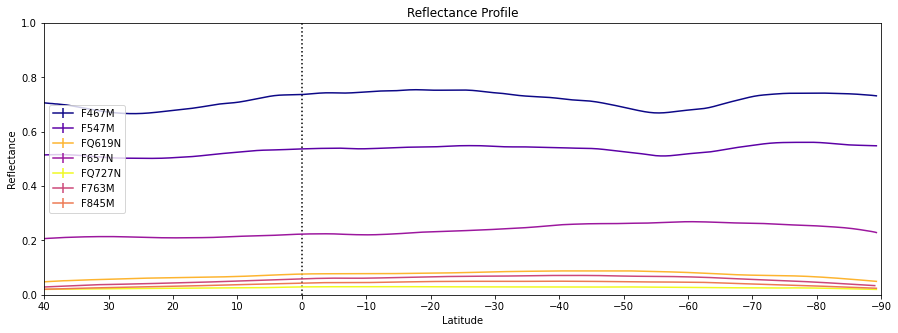

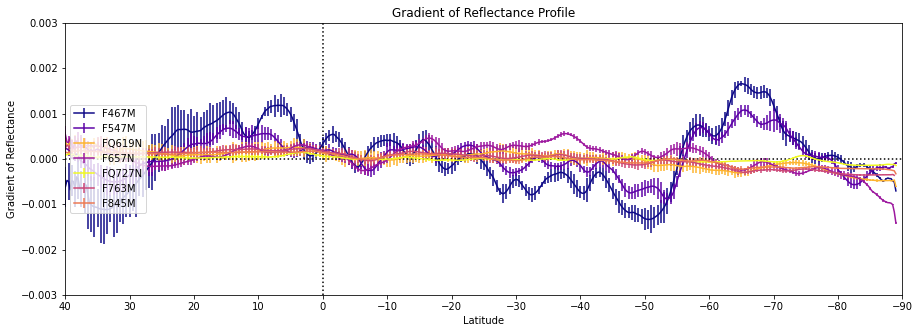

In [35]:
plt.figure(figsize=(15,5)) #set up a figure space
axR = plt.subplot(111) #create a set of axes within the figure
axR.errorbar(ytestf467[4], ytestf467[0], yerr = ytestf467[2], label = 'F467M', errorevery = degpererrbar*2, color = colours[0])
axR.errorbar(ytestf547[4], ytestf547[0], yerr = ytestf547[2], label = 'F547M', errorevery = degpererrbar*2, color = colours[1])
axR.errorbar(ytestf619[4], ytestf619[0], yerr = ytestf619[2], label = 'FQ619N', errorevery = degpererrbar*2, color = colours[5])
axR.errorbar(ytestf657[4], ytestf657[0], yerr = ytestf657[2], label = 'F657N', errorevery = degpererrbar*2, color = colours[2])
axR.errorbar(ytestf727[4], ytestf727[0], yerr = ytestf727[2], label = 'FQ727N', errorevery = degpererrbar*2, color = colours[6])
axR.errorbar(ytestf763[4], ytestf763[0], yerr = ytestf763[2], label = 'F763M', errorevery = degpererrbar*2, color = colours[3])
axR.errorbar(ytestf845[4], ytestf845[0], yerr = ytestf845[2], label = 'F845M', errorevery = degpererrbar*2, color = colours[4])
plt.title('Reflectance Profile')
plt.xticks(latticks)
plt.xlabel('Latitude')
plt.xlim(latlimits) #latitude limit setting
plt.ylabel('Reflectance')
plt.ylim([0,1]) #reflectance limit setting
plt.axvline(x=0, color='black', ls=':') #plots line at neptunian equator
plt.legend(loc='center left')
#plt.savefig("2019DepthR.png", bbox_inches = 'tight', facecolor = 'white')

plt.figure(figsize=(15,5)) #set up a figure space
axR = plt.subplot(111) #create a set of axes within the figure
axR.errorbar(ytestf467[4], ytestf467[1], yerr = ytestf467[3], label = 'F467M', errorevery = degpererrbar*2, color = colours[0])
axR.errorbar(ytestf547[4], ytestf547[1], yerr = ytestf547[3], label = 'F547M', errorevery = degpererrbar*2, color = colours[1])
axR.errorbar(ytestf619[4], ytestf619[1], yerr = ytestf619[3], label = 'FQ619N', errorevery = degpererrbar*2, color = colours[5])
axR.errorbar(ytestf657[4], ytestf657[1], yerr = ytestf657[3], label = 'F657N', errorevery = degpererrbar*2, color = colours[2])
axR.errorbar(ytestf727[4], ytestf727[1], yerr = ytestf727[3], label = 'FQ727N', errorevery = degpererrbar*2, color = colours[6])
axR.errorbar(ytestf763[4], ytestf763[1], yerr = ytestf763[3], label = 'F763M', errorevery = degpererrbar*2, color = colours[3])
axR.errorbar(ytestf845[4], ytestf845[1], yerr = ytestf845[3], label = 'F845M', errorevery = degpererrbar*2, color = colours[4])
plt.title('Gradient of Reflectance Profile')
plt.xticks(latticks)
plt.xlabel('Latitude')
plt.xlim(latlimits) #latitude limit setting
plt.ylabel('Gradient of Reflectance')
plt.ylim([-0.003,0.003]) #reflectance limit setting
plt.axhline(y=0, color='black', ls=':')
plt.axvline(x=0, color='black', ls=':') #plots line at neptunian equator
plt.legend(loc='center left')
#plt.savefig("845AllTimeG.png", bbox_inches = 'tight', facecolor = 'white')

# 467 line plots overlayed OPAL vs Me

In [8]:
file = '2019_467.csv'
R = []
GradR = []
Rsem = []
GradRErr = []
lat = []
rows = []


with open('../../OPAL STUFF/plotdata/'+file) as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 1
    for row in csv_reader:
        if line_count % 2 != 0:
            if row[0] == 'nan':
                R.append(np.nan)
            else:
                R.append(float(row[0]))
            if row[1] == 'nan':
                GradR.append(np.nan)
            else:
                GradR.append(float(row[1]))
            if row[2] == 'nan':
                Rsem.append(np.nan)
            else:
                Rsem.append(float(row[2]))
            if row[3] == 'nan':
                GradRErr.append(np.nan)
            else:
                GradRErr.append(float(row[3]))
            if row[4] == 'nan':
                lat.append(np.nan)
            else:
                lat.append(row[4])
        line_count += 1
lat = -1*(((180/len(R))*np.arange(len(R)))-90)
y2019f467 = [R,GradR,Rsem,GradRErr,lat]
print(file+' has been read successfully.')

2019_467.csv has been read successfully.


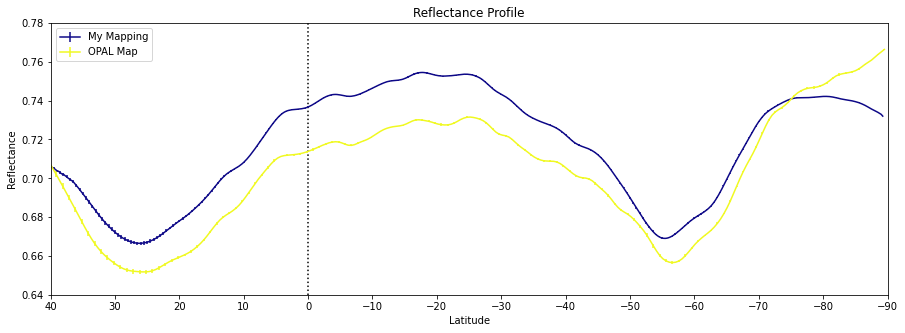

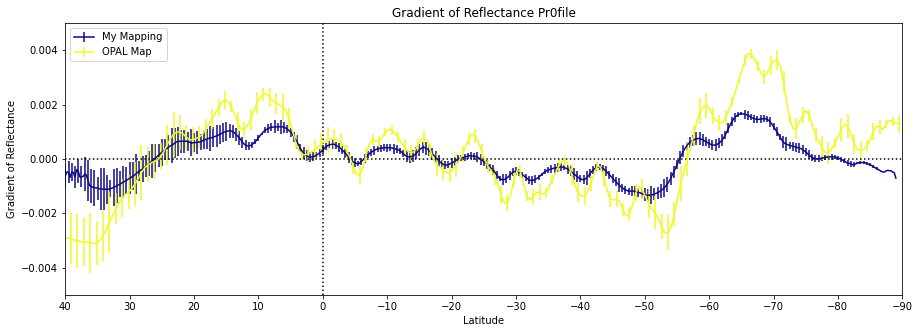

In [18]:
plt.figure(figsize=(15,5)) #set up a figure space
axR = plt.subplot(111) #create a set of axes within the figure
axR.errorbar(ytestf467[4], ytestf467[0], yerr = ytestf467[2], label = 'My Mapping', errorevery = degpererrbar*2, color = colours[0])
axR.errorbar(y2019f467[4], y2019f467[0], yerr = y2019f467[2], label = 'OPAL Map', errorevery = degpererrbar*2, color = colours[6])
plt.title('Reflectance Profile')
plt.xticks(latticks)
plt.xlabel('Latitude')
plt.xlim(latlimits) #latitude limit setting
plt.ylabel('Reflectance')
plt.ylim([0.64,0.78]) #reflectance limit setting
plt.axvline(x=0, color='black', ls=':') #plots line at neptunian equator
plt.legend(loc='upper left')
#plt.savefig("2019DepthR.png", bbox_inches = 'tight', facecolor = 'white')

plt.figure(figsize=(15,5)) #set up a figure space
axR = plt.subplot(111) #create a set of axes within the figure
axR.errorbar(ytestf467[4], ytestf467[1], yerr = ytestf467[3], label = 'My Mapping', errorevery = degpererrbar*2, color = colours[0])
axR.errorbar(y2019f467[4], y2019f467[1], yerr = y2019f467[3], label = 'OPAL Map', errorevery = degpererrbar*2, color = colours[6])
plt.title('Gradient of Reflectance Pr0file')
plt.xticks(latticks)
plt.xlabel('Latitude')
plt.xlim(latlimits) #latitude limit setting
plt.ylabel('Gradient of Reflectance')
plt.ylim([-0.005,0.005]) #reflectance limit setting
plt.axhline(y=0, color='black', ls=':')
plt.axvline(x=0, color='black', ls=':') #plots line at neptunian equator
plt.legend(loc='upper left')
#plt.savefig("2019DepthR.png", bbox_inches = 'tight', facecolor = 'white')